<a href="https://colab.research.google.com/github/kiranbeethoju/Stock-Market-Forecast/blob/master/stock_predictions_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
ticks_dict = [{"comapny":"AXISBANK.NS","start":"1999-01-01"}, {"comapny":"WIPRO.NS","start":"1996-01-01"},
              {"comapny":"HINDPETRO.NS","start":"1996-01-01"},
              {"comapny":"ONGC.NS","start":"1996-01-01"},
              {"comapny":"INFY.NS","start":"1996-01-01"},
              {"comapny":"TECHM.NS","start":"2006-08-01"},
              {"comapny":"TATACONSUM.NS","start":"2017-06-01"},
              {"comapny":"M&M.NS","start":"1996-01-01",
               "comapny":"TATASTEEL.NS","start":"1996-01-01"}]



In [1]:
!pip install fbprophet
import datetime
import pandas as pd
import numpy as np
import pylab as pl
import datetime
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from matplotlib.collections import LineCollection
from pandas_datareader import data as wb
from sklearn import cluster, covariance, manifold

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
start = '1996-01-01'
end = '2020-07-15'
#edit your company here
tickers = ['BHEL.NS']

thelen = len(tickers)

price_data = []
for ticker in tickers:
    prices = wb.DataReader(ticker, start = start, end = end, data_source='yahoo')[['Open','Adj Close']]
    price_data.append(prices.assign(ticker=ticker)[['ticker', 'Open', 'Adj Close']])

#names = np.reshape(price_data, (len(price_data), 1))

names = pd.concat(price_data)
names.reset_index()



,Date,ticker,Open,Adj Close
0,1996-01-01,BHEL.NS,5.733330,0.348257
1,1996-01-02,BHEL.NS,5.883330,0.332473
2,1996-01-03,BHEL.NS,5.616670,0.337405
3,1996-01-04,BHEL.NS,5.700000,0.331486
4,1996-01-05,BHEL.NS,5.600000,0.337405
...,...,...,...,...
6052,2020-07-08,BHEL.NS,42.500000,41.250000
6053,2020-07-09,BHEL.NS,41.799999,42.049999
6054,2020-07-10,BHEL.NS,42.150002,41.400002
6055,2020-07-13,BHEL.NS,42.450001,42.599998


In [4]:
names = names.reset_index()
day_exclusion = ['Saturday', 'Sunday']
names = names[names.Date.dt.weekday < 5]


6057


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

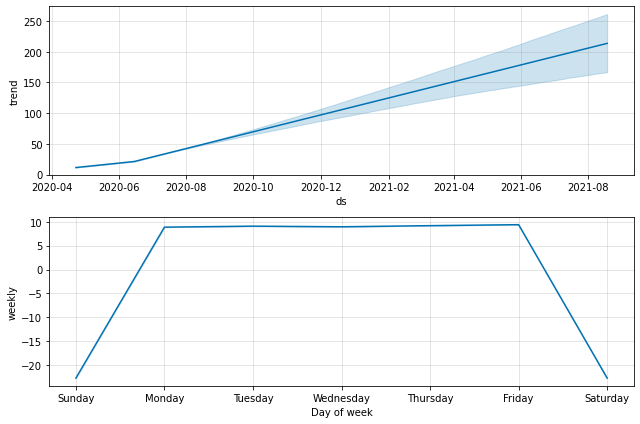

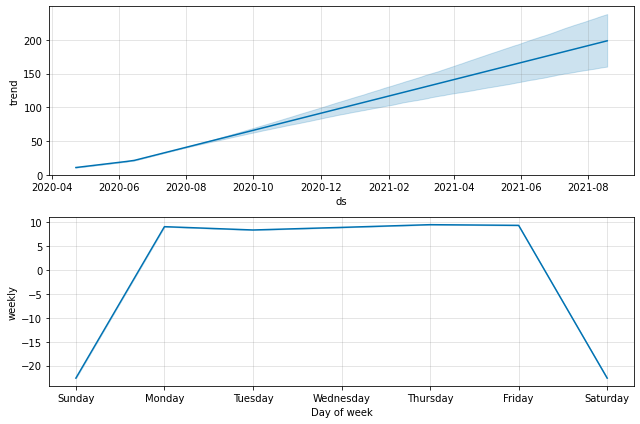

In [5]:

#pd.set_option('display.max_columns', 500)

open = np.array([q['Open'] for q in price_data]).astype(np.float)
close = np.array([q['Adj Close'] for q in price_data]).astype(np.float)
print(len(names))
#names = names.reset_index()
open = names.rename(columns={'Date':'ds','Open':'y'})
open = open[['ds','y']]
close = names.rename(columns={'Date':'ds','Adj Close':'y'})
close = close[["ds","y"]]
from fbprophet import Prophet
from plotly.graph_objs import *

df = open

def run(df,name):
  df = df[6000:]
  #df = df[df['ds'].dt.dayofweek < 5]
  m = Prophet()
  m.fit(df)
  future = m.make_future_dataframe(periods=400)
  future.tail()
  forecast = m.predict(future)
  fig = m.plot_components(forecast)
  future = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  future = future.rename(columns={"yhat":"yhat_future","yhat_lower":"yhat_lower_future","yhat_upper":"yhat_upper_future"})
  mixed = pd.merge(df,future,on="ds",how="inner")
  mixed.tail(30)
  avg = (mixed["yhat_future"].iloc[0]+mixed["yhat_lower_future"].iloc[0]+mixed["yhat_upper_future"].iloc[0])/3
  mixed["avg_val"] = ''
  for i in range(0, len(mixed)):
    avg = (mixed["yhat_future"].iloc[i]+mixed["yhat_lower_future"].iloc[i]+mixed["yhat_upper_future"].iloc[i])/3
    mixed['avg_val'].iloc[i] = avg
  mixed = mixed
  import plotly as py

  import plotly.graph_objects as go
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["y"],
                      mode='lines',
                      name='Actual Opening Values'))
  fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["yhat_future"],
                      mode='lines+markers',
                      name='Predicted Opening Values'))
  fig.show()
  fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["y"],
                      mode='lines',
                      name='Actual Opening Values'))
  fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["avg_val"],
                      mode='markers',
                      name='Predicted Opening Avg Values '))

  fig.show()
  future.to_csv(f'{name}-{tickers[0]}.csv')
  return mixed
a = run(open,"open")
b = run(close,"close")
a = a.rename(columns={"avg_val":"pred_open_avg","y":"actual_open","yhat_upper_future":"yhat_upper_future_open","yhat_future":"yhat_future_open","yhat_lower_future":"yhat_lower_future_open"})
b = b.rename(columns={"avg_val":"pred_close_avg","y":"actual_close","yhat_upper_future":"yhat_upper_future_close","yhat_future":"yhat_future_close","yhat_lower_future":"yhat_lower_future_close"})
c = pd.merge(a,b,on="ds",how="inner")
df = c[["ds","actual_open","pred_open_avg","actual_close","pred_close_avg"]]
df["open_diff"] = df["pred_open_avg"]-df["actual_open"]
df["close_diff"] = df["pred_close_avg"]-df["actual_close"]
df["actual_raise_of_value"] = df["actual_close"] - df["actual_open"]
df["predicted_raise_of_value"] = df["pred_close_avg"] - df["pred_open_avg"]
df.tail(10)
df.to_csv("{}_complete_analysis.csv".format(tickers[0]))

In [6]:
df = pd.read_csv("{}_complete_analysis.csv".format(tickers[0]))
df.head()

,Unnamed: 0,ds,actual_open,pred_open_avg,actual_close,pred_close_avg,open_diff,close_diff,actual_raise_of_value,predicted_raise_of_value
0,0,2020-04-23,21.600000,20.547490,21.400000,20.858976,-1.052511,-0.541023,-0.200001,0.311486
1,1,2020-04-24,21.100000,20.894854,20.650000,20.879762,-0.205146,0.229762,-0.450001,-0.015093
2,2,2020-04-27,20.950001,20.922200,20.650000,21.185339,-0.027801,0.535339,-0.300001,0.263139
3,3,2020-04-28,20.750000,21.319467,20.950001,20.668803,0.569467,-0.281198,0.200001,-0.650664
4,4,2020-04-29,21.000000,21.438734,20.950001,21.425608,0.438734,0.475607,-0.049999,-0.013125


In [7]:
import plotly as py

import plotly.graph_objects as go
fig = go.Figure()
mixed = df
fig.update_layout(
      title="Actual Open vs Actual Close & Pred Open vs Pred Close Prices Trend of =>> {}".format(tickers[0]),
      xaxis_title="Date",
      yaxis_title="Price",
      font=dict(
          family="Courier New, monospace",
          size=16,
          color="#7f7f7f"
      )
  )

fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["actual_open"],
                    mode='lines',
                    name='Actual Opening Values',line=dict(color='mediumspringgreen', width=4, dash='solid')))
fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["pred_open_avg"],
                    mode='lines+markers',
                    name='Predicted Opening Values',line=dict(color='mediumseagreen', width=4, dash='dot')))


fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["actual_close"],
                    mode='lines',
                    name='Actual Close Values ',line=dict(color='blue', width=4, dash='solid')))
fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["pred_close_avg"],
                    mode='lines',
                    name='Predicted Close Values ',line=dict(color='royalblue', width=4, dash='dot')))
fig.show()
#### Drawing difference between actual vs predicted 


In [8]:
fig.update_layout(
      title="Actual Raise/Fall & Predicted Raise/Fall share value Trend of =>> {}".format(tickers[0]),
      xaxis_title="Date",
      yaxis_title="Price",
      font=dict(
          family="Courier New, monospace",
          size=16,
          color="#7f7f7f"
      )
  )
fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["actual_raise_of_value"],
                    mode='lines',
                    name='Actual Opening Values',line=dict(color='yellow', width=4, dash='solid')))
fig.add_trace(go.Scatter(x=mixed["ds"], y=mixed["predicted_raise_of_value"],
                    mode='lines+markers',
                    name='Predicted Opening Values',line=dict(color='red', width=4, dash='dot')))
fig.show()

In [9]:
mdf = pd.read_csv("close-{}.csv".format(tickers[0]))
ndf = pd.read_csv("open-{}.csv".format(tickers[0]))
mdf["Close_Avg_Pred"] = (mdf["yhat_future"]+mdf["yhat_lower_future"]+mdf["yhat_upper_future"])/3
mdf = mdf[["ds","Close_Avg_Pred"]]
ndf["Open_Avg_Pred"] = (ndf["yhat_future"]+ndf["yhat_lower_future"]+ndf["yhat_upper_future"])/3
ndf= ndf[["ds","Open_Avg_Pred"]]
pred_future= pd.merge(mdf,ndf,on="ds",how="inner")
pred_future


,ds,Close_Avg_Pred,Open_Avg_Pred
0,2020-04-23,20.858976,20.547490
1,2020-04-24,20.879762,20.894854
2,2020-04-27,21.185339,20.922200
3,2020-04-28,20.668803,21.319467
4,2020-04-29,21.425608,21.438734
...,...,...,...
452,2021-08-14,174.595822,189.745206
453,2021-08-15,174.932531,190.112640
454,2021-08-16,207.292197,222.162992
455,2021-08-17,206.650242,222.501177


In [10]:
pred_future["expected_raise"] = pred_future["Close_Avg_Pred"]-pred_future["Open_Avg_Pred"]
pred_future.head(60)

,ds,Close_Avg_Pred,Open_Avg_Pred,expected_raise
0,2020-04-23,20.858976,20.547490,0.311486
1,2020-04-24,20.879762,20.894854,-0.015093
2,2020-04-27,21.185339,20.922200,0.263139
3,2020-04-28,20.668803,21.319467,-0.650664
4,2020-04-29,21.425608,21.438734,-0.013125
5,2020-04-30,22.207211,21.833807,0.373403
6,2020-05-04,22.476672,22.201358,0.275314
7,2020-05-05,22.034087,22.682242,-0.648155
8,2020-05-06,22.707125,22.717200,-0.010076
9,2020-05-07,23.525741,23.156103,0.369638
